In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [96]:
# Load the dataset
df = pd.read_csv('food.csv')

In [97]:
# Clean the column names
df.columns = df.columns.str.strip()

In [99]:
# Check for missing values and fill them
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)


Missing Values in each column:
 Category                0
Data.Carbohydrate       0
Data.Protein            0
Data.Sugar Total        0
Data.Fat.Total Lipid    0
Data.Kilocalories       0
dtype: int64


In [100]:
# Function to remove outliers
def remove_outliers(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]

# Columns to check for outliers
columns_to_check = ['Data.Kilocalories', 'Data.Fat.Total Lipid', 'Data.Protein', 'Data.Carbohydrate', 'Data.Sugar Total']
cleaned_df = remove_outliers(df, columns_to_check)

# Save cleaned dataset
cleaned_df.to_csv('cleaned_food.csv', index=False)
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {cleaned_df.shape}")

Original dataset shape: (7413, 6)
Cleaned dataset shape: (6941, 6)


In [101]:
# Encode the 'Category' column
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

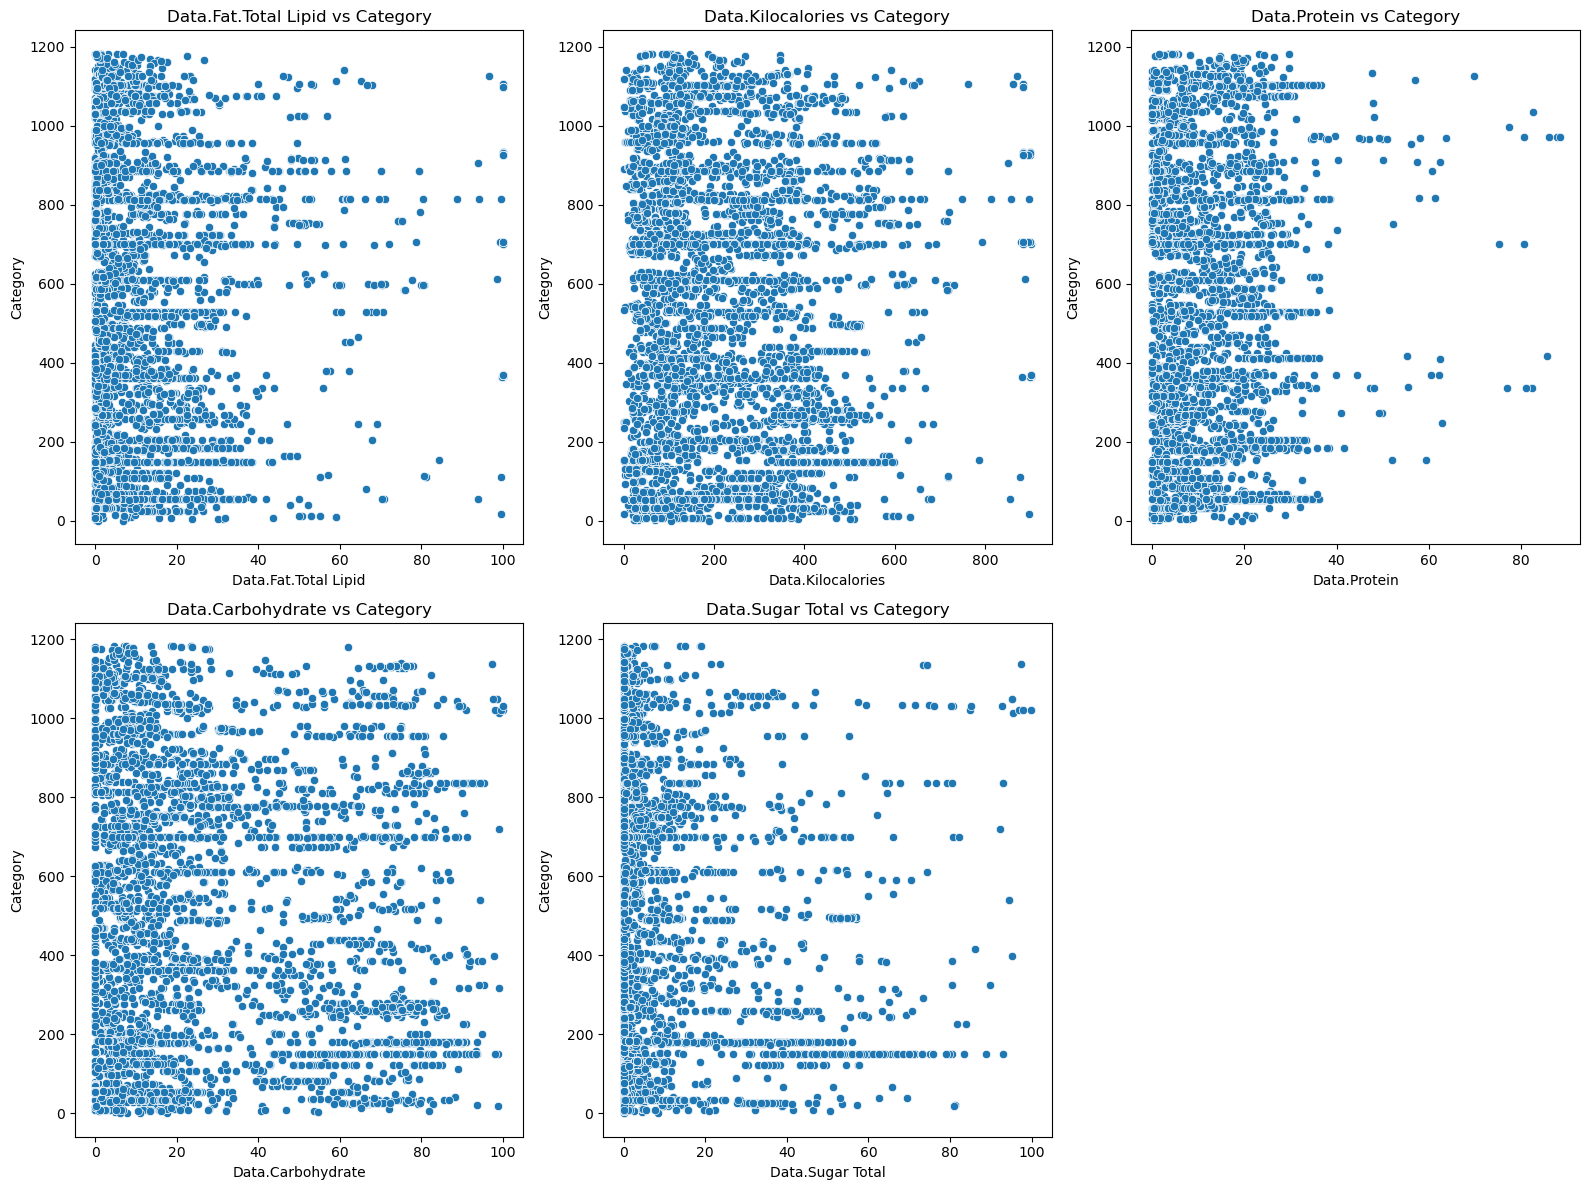

In [102]:
# Scatter plots
plt.figure(figsize=(16, 12))
features = ['Data.Fat.Total Lipid', 'Data.Kilocalories', 'Data.Protein', 'Data.Carbohydrate', 'Data.Sugar Total']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='Category')
    plt.title(f'{feature} vs Category')
plt.tight_layout()
plt.show()

In [103]:
# Define features and target
X = df[['Data.Kilocalories', 'Data.Fat.Total Lipid', 'Data.Protein', 'Data.Carbohydrate', 'Data.Sugar Total']]
y = df['Category']

In [104]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [105]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [106]:
# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [107]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 309.75
Mean Squared Error: 124396.85
R^2 Score: 0.02


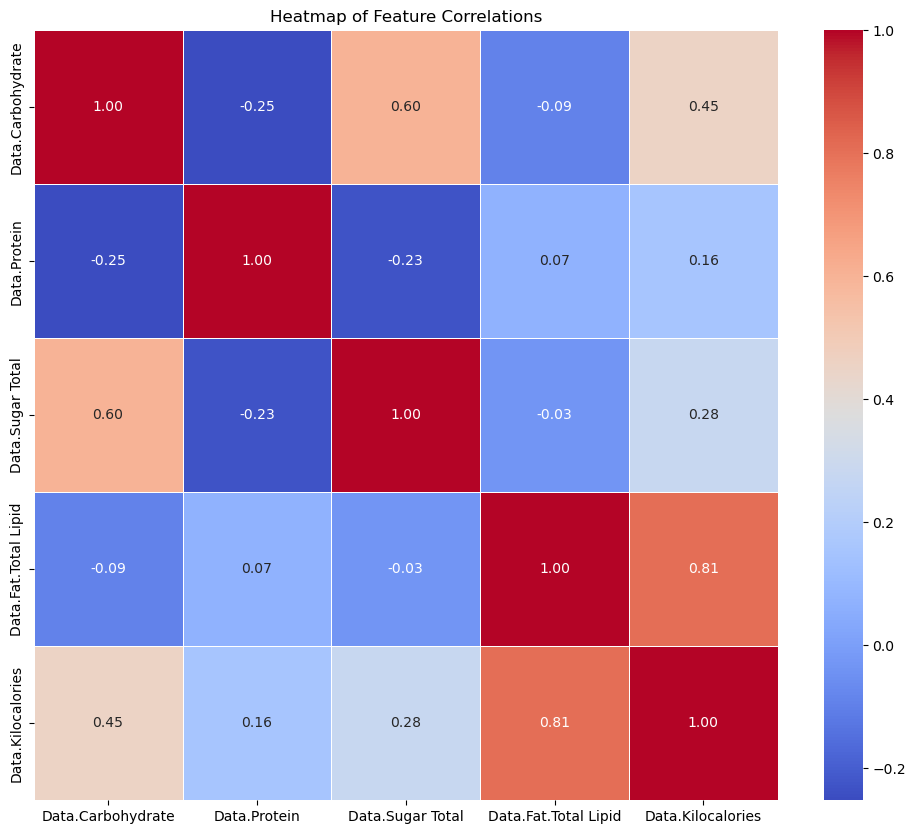

In [108]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()


In [110]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming you have trained your model and fit the scaler and label encoder

# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(label_encoder, le_file)

print("Model, scaler, and label encoder have been saved.")


Model, scaler, and label encoder have been saved.


In [111]:
# Example prediction
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('label_encoder.pkl', 'rb') as le_file:
    label_encoder = pickle.load(le_file)

sample_data = {
    'Data.Kilocalories': 250,
    'Data.Fat.Total Lipid': 10,
    'Data.Protein': 15,
    'Data.Carbohydrate': 30,
    'Data.Sugar Total': 5
}
features = np.array([[
    sample_data['Data.Kilocalories'],
    sample_data['Data.Fat.Total Lipid'],
    sample_data['Data.Protein'],
    sample_data['Data.Carbohydrate'],
    sample_data['Data.Sugar Total']
]])
scaled_features = scaler.transform(features)
prediction = model.predict(scaled_features)

try:
    predicted_category = label_encoder.inverse_transform(np.round(prediction).astype(int))
    print(f'Predicted Category: {predicted_category[0]}')
except:
    print(f'Predicted Value: {prediction[0]}')

Predicted Category: KIELBASA


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Correlation value: 0.97
Model intercept: -0.72


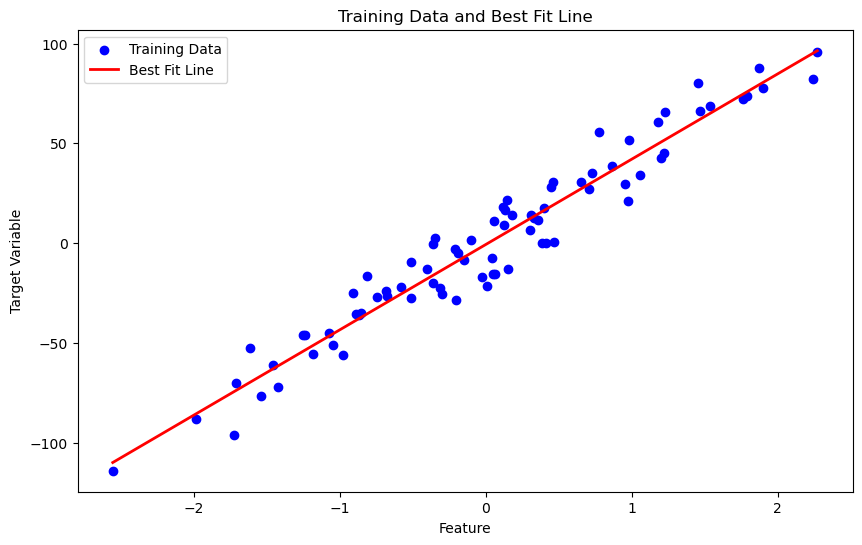

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate example data (replace with your actual data loading process)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate the correlation between the feature and the target variable
feature_index = 0  # Adjust this index if you want to use a different feature
feature_train = X_train[:, feature_index]
correlation_value = np.corrcoef(feature_train.flatten(), y_train)[0, 1]

# Print the correlation value and the intercept of the model
print(f"Correlation value: {correlation_value:.2f}")
print(f"Model intercept: {lr.intercept_:.2f}")

# Plot training data and best fit line
plt.figure(figsize=(10, 6))
plt.scatter(feature_train, y_train, color='blue', label='Training Data')

# Predict values using the trained model
sorted_indices = np.argsort(feature_train.flatten())  # Flatten to 1D
sorted_feature_train = feature_train[sorted_indices]
sorted_y_pred = lr.predict(sorted_feature_train.reshape(-1, 1))

# Plot the best fit line
plt.plot(sorted_feature_train, sorted_y_pred, color='red', linewidth=2, label='Best Fit Line')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target Variable')
plt.title('Training Data and Best Fit Line')
plt.legend()

# Show the plot
plt.show()
